# Ecercise 2.
Implement a function that returns the adjacency matrix of one
realization of the ER graph with given values of N and p. Watch out
for the trap!


In [2]:
import numpy as np

def er_graph_adj_matrix(N, p):
    A = np.zeros((N, N), dtype=int)

    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                A[i, j] = 1
                A[j, i] = 1

    return A


In [3]:
A = er_graph_adj_matrix(50, 0.2)
print(A)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Excercise 3.
Draw resulting graph


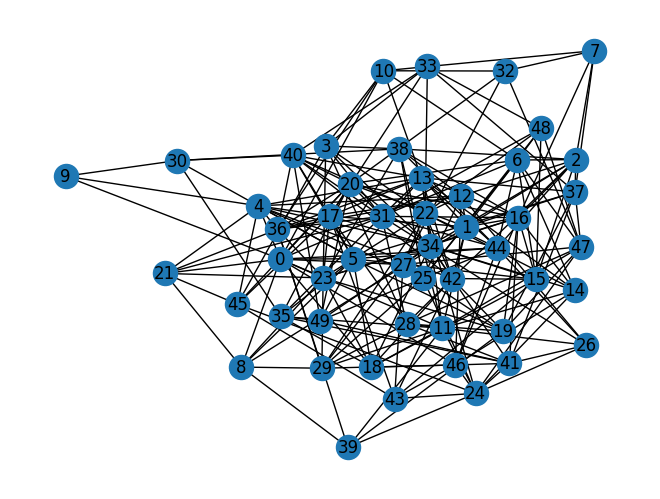

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_er_graph(N, p):
    A = er_graph_adj_matrix(N, p)
    G = nx.from_numpy_array(A)
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, with_labels=True)
    plt.show()
    return A, G

A, G = draw_er_graph(50, 0.2)


Excercise 4.
Draw histogram of degree distribution.

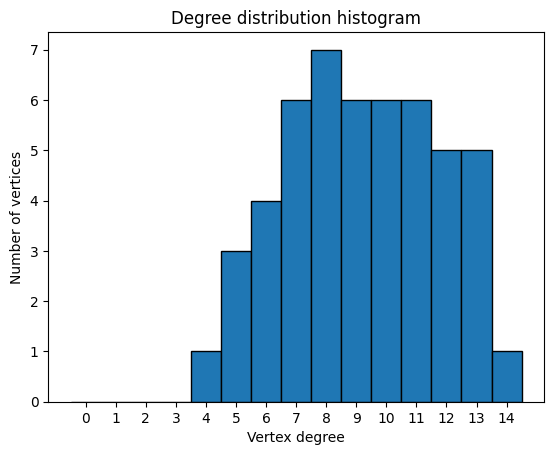

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def draw_degree_histogram(A):
    G = nx.from_numpy_array(A)
    degrees = [d for n, d in G.degree()]

    # Integer bins
    bins = np.arange(0, max(degrees) + 2) - 0.5

    plt.figure()
    plt.hist(degrees, bins=bins, edgecolor='black')
    plt.xlabel("Vertex degree")
    plt.ylabel("Number of vertices")
    plt.title("Degree distribution histogram")
    plt.xticks(range(0, max(degrees) + 1))
    plt.show()

N = 50
p = 0.2
A = er_graph_adj_matrix(N, p)
draw_degree_histogram(A)



# Excercise 5.
What degree of vertex distribution do we expect?


In an Erdős–Rényi graph **G(N, p)**, the degree of each vertex follows a **binomial distribution**:

$$
\deg(v) \sim \text{Binomial}(N-1,\, p)
$$

**Expected degree:**

$$
\mathbb{E}[\deg(v)] = (N-1)p
$$





# Excercise 6.
Give the mathematical justification for the Poisson approximation
used. - https://healy.econ.ohio-state.edu/kcb/Ma103/Notes/Lecture13.pdf

In an Erdős–Rényi graph \(G(N,p)\), the degree of a fixed vertex has a binomial distribution
$$
\deg(v) \sim \text{Binomial}(N-1, p).
$$

Let
$$
n = N - 1, \quad X \sim \text{Binomial}(n, p).
$$
We choose
$$
p = \frac{\lambda}{n},
$$
so that
$$
\mathbb{E}[X] = np = \lambda
$$
stays fixed as \(n \to \infty\).

The binomial pmf is
$$
\mathbb{P}(X = k)
= \binom{n}{k} p^k (1-p)^{n-k}
= \binom{n}{k} \left(\frac{\lambda}{n}\right)^k
\left(1 - \frac{\lambda}{n}\right)^{n-k}.
$$

We now take the limit as \(n \to \infty\) for fixed \(k\).

First term:
$$
\binom{n}{k} \left(\frac{\lambda}{n}\right)^k
= \frac{n(n-1)\cdots(n-k+1)}{k!} \cdot \frac{\lambda^k}{n^k}
= \frac{\lambda^k}{k!} \prod_{j=0}^{k-1} \left(1 - \frac{j}{n}\right)
\longrightarrow \frac{\lambda^k}{k!}.
$$

Second term:
$$
\left(1 - \frac{\lambda}{n}\right)^{n-k}
= \left(1 - \frac{\lambda}{n}\right)^n
  \left(1 - \frac{\lambda}{n}\right)^{-k}
\longrightarrow e^{-\lambda} \cdot 1
= e^{-\lambda}.
$$

Combining these limits:
$$
\mathbb{P}(X = k)
\longrightarrow e^{-\lambda} \frac{\lambda^k}{k!},
$$
which is exactly the pmf of a Poisson\((\lambda)\) distribution.

Therefore, for large \(N\) and small \(p\) with \((N-1)p = \lambda\) fixed, the degree of a vertex in \(G(N,p)\) is well approximated by a Poisson\((\lambda)\) distribution.


# Excercise 7.
Plot both the simulation results and analytically obtained
distributions on one graph. Test appropriate hypotheses.

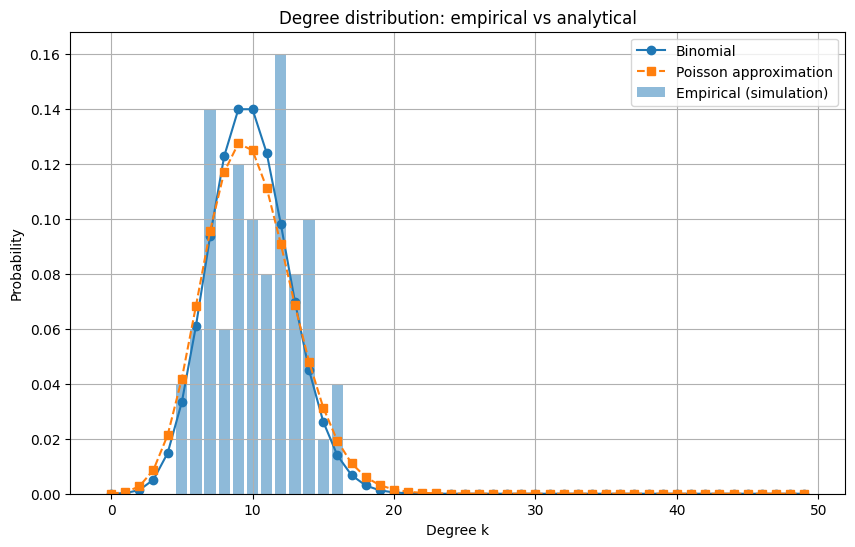

Chi-square test (Binomial fit): Power_divergenceResult(statistic=np.float64(13.902006342637234), pvalue=np.float64(0.9999998188932645))
Chi-square test (Poisson fit): Power_divergenceResult(statistic=np.float64(12.887407077453823), pvalue=np.float64(0.999999954229956))


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, chisquare

def compare_empirical_and_analytical(N, p):
    A = er_graph_adj_matrix(N, p)

    degrees = np.array([sum(row) for row in A])

    k = np.arange(0, N)

    counts_full = np.zeros_like(k, dtype=int)
    values, counts = np.unique(degrees, return_counts=True)
    counts_full[values] = counts

    prob_emp = counts_full / counts_full.sum()

    prob_binom = binom.pmf(k, N - 1, p)

    lam = (N - 1) * p
    prob_poisson = poisson.pmf(k, lam)

    plt.figure(figsize=(10, 6))
    plt.bar(k, prob_emp, alpha=0.5, label="Empirical (simulation)")
    plt.plot(k, prob_binom, "o-", label="Binomial")
    plt.plot(k, prob_poisson, "s--", label="Poisson approximation")
    plt.xlabel("Degree k")
    plt.ylabel("Probability")
    plt.title("Degree distribution: empirical vs analytical")
    plt.legend()
    plt.grid(True)
    plt.show()

    n_vertices = len(degrees)

    exp_binom = prob_binom * n_vertices

    prob_poisson_trunc = prob_poisson / prob_poisson.sum()
    exp_poisson = prob_poisson_trunc * n_vertices

    chi_binom = chisquare(counts_full, f_exp=exp_binom)
    chi_poisson = chisquare(counts_full, f_exp=exp_poisson)

    print("Chi-square test (Binomial fit):", chi_binom)
    print("Chi-square test (Poisson fit):", chi_poisson)


compare_empirical_and_analytical(50, 0.2)

# Summary:
The empirical degree distribution matches both the Binomial(N−1, p)
and its Poisson(λ=(N−1)p) approximation very well.
Chi-square tests give extremely high p-values (~1), so we do not reject
either hypothesis. The simulation agrees with the theoretical ER predictions.


# Excercises 8.
Check dependence of the results of the previous excercise for
various values of p and N.


N=  50, p=0.001 -> Binom p≈0.413, Poisson p≈0.413
N=  50, p=0.005 -> Binom p≈0.432, Poisson p≈0.431
N=  50, p=0.010 -> Binom p≈0.392, Poisson p≈0.391
N=  50, p=0.050 -> Binom p≈0.439, Poisson p≈0.443
N= 100, p=0.001 -> Binom p≈0.377, Poisson p≈0.377
N= 100, p=0.005 -> Binom p≈0.417, Poisson p≈0.418
N= 100, p=0.010 -> Binom p≈0.458, Poisson p≈0.459
N= 100, p=0.050 -> Binom p≈0.474, Poisson p≈0.478
N= 200, p=0.001 -> Binom p≈0.426, Poisson p≈0.427
N= 200, p=0.005 -> Binom p≈0.444, Poisson p≈0.445
N= 200, p=0.010 -> Binom p≈0.429, Poisson p≈0.430
N= 200, p=0.050 -> Binom p≈0.435, Poisson p≈0.445
N= 500, p=0.001 -> Binom p≈0.412, Poisson p≈0.412
N= 500, p=0.005 -> Binom p≈0.416, Poisson p≈0.419
N= 500, p=0.010 -> Binom p≈0.492, Poisson p≈0.498
N= 500, p=0.050 -> Binom p≈0.455, Poisson p≈0.476
N=1000, p=0.001 -> Binom p≈0.408, Poisson p≈0.408
N=1000, p=0.005 -> Binom p≈0.443, Poisson p≈0.446
N=1000, p=0.010 -> Binom p≈0.472, Poisson p≈0.479
N=1000, p=0.050 -> Binom p≈0.478, Poisson p≈0.490


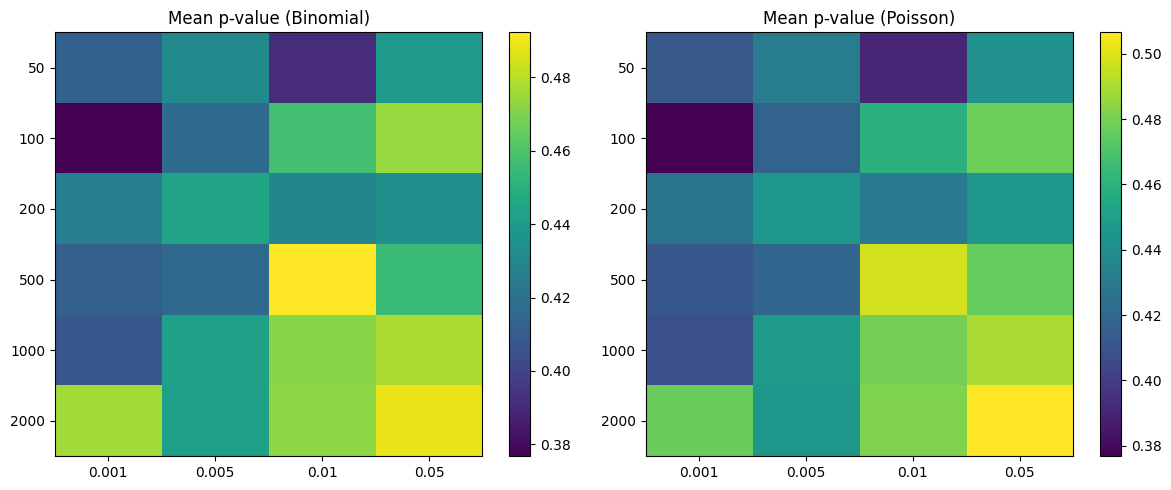

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, chisquare

def safe_chisquare(counts_full, exp_full, thresh=1.0):
    mask = exp_full > thresh
    obs = counts_full[mask]
    exp = exp_full[mask]
    if obs.size < 2:
        return np.nan
    scale = obs.sum() / exp.sum()
    exp = exp * scale
    return chisquare(obs, f_exp=exp).pvalue

def fit_degree_distribution_once(N, p):
    A = er_graph_adj_matrix(N, p)
    degrees = np.array([sum(row) for row in A])
    k = np.arange(0, N)

    counts_full = np.zeros_like(k, dtype=int)
    values, counts = np.unique(degrees, return_counts=True)
    counts_full[values] = counts

    n = len(degrees)

    prob_binom = binom.pmf(k, N - 1, p)
    exp_binom = prob_binom * n

    lam = (N - 1) * p
    prob_poisson = poisson.pmf(k, lam)
    prob_poisson_trunc = prob_poisson / prob_poisson.sum()
    exp_poisson = prob_poisson_trunc * n

    p_binom = safe_chisquare(counts_full, exp_binom, thresh=1.0)
    p_pois = safe_chisquare(counts_full, exp_poisson, thresh=1.0)

    return p_binom, p_pois

def explore_N_p_dependence():
    N_list = [50, 100, 200, 500, 1000, 2000]
    p_list = [0.001, 0.005, 0.01, 0.05]
    n_trials = 300
    binom_matrix = np.zeros((len(N_list), len(p_list)))
    pois_matrix = np.zeros((len(N_list), len(p_list)))

    for i, N in enumerate(N_list):
        for j, p in enumerate(p_list):
            binom_pvals = []
            pois_pvals = []
            for _ in range(n_trials):
                pb, pp = fit_degree_distribution_once(N, p)
                binom_pvals.append(pb)
                pois_pvals.append(pp)
            binom_matrix[i, j] = np.mean(binom_pvals)
            pois_matrix[i, j] = np.mean(pois_pvals)
            print(f"N={N:4d}, p={p:5.3f} -> Binom p≈{binom_matrix[i,j]:.3f}, Poisson p≈{pois_matrix[i,j]:.3f}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axes[0].imshow(binom_matrix, cmap="viridis", aspect="auto")
    axes[0].set_xticks(range(len(p_list)))
    axes[0].set_xticklabels(p_list)
    axes[0].set_yticks(range(len(N_list)))
    axes[0].set_yticklabels(N_list)
    axes[0].set_title("Mean p-value (Binomial)")
    fig.colorbar(im1, ax=axes[0])

    im2 = axes[1].imshow(pois_matrix, cmap="viridis", aspect="auto")
    axes[1].set_xticks(range(len(p_list)))
    axes[1].set_xticklabels(p_list)
    axes[1].set_yticks(range(len(N_list)))
    axes[1].set_yticklabels(N_list)
    axes[1].set_title("Mean p-value (Poisson)")
    fig.colorbar(im2, ax=axes[1])

    plt.tight_layout()
    plt.show()

    return binom_matrix, pois_matrix

results = explore_N_p_dependence()


## Summary

For all tested values of
N and
p, both the Binomial and Poisson models show high average p-values, meaning that the empirical degree distributions agree well with the theoretical predictions of the ER model. The Binomial distribution consistently fits slightly better, while the Poisson approximation becomes more accurate for small
p and larger
N, which matches the theoretical limit where Poisson emerges from Binomial. Overall, both hypotheses are supported across all tested parameter ranges.


# P5.2
 Check the above analytical result by simulation

p = 0.010,  simulated <C> = 0.0049 ± 0.0053,  theory = 0.010
p = 0.050,  simulated <C> = 0.0506 ± 0.0041,  theory = 0.050
p = 0.090,  simulated <C> = 0.0897 ± 0.0034,  theory = 0.090
p = 0.130,  simulated <C> = 0.1303 ± 0.0034,  theory = 0.130
p = 0.170,  simulated <C> = 0.1694 ± 0.0034,  theory = 0.170
p = 0.210,  simulated <C> = 0.2104 ± 0.0033,  theory = 0.210
p = 0.250,  simulated <C> = 0.2500 ± 0.0035,  theory = 0.250


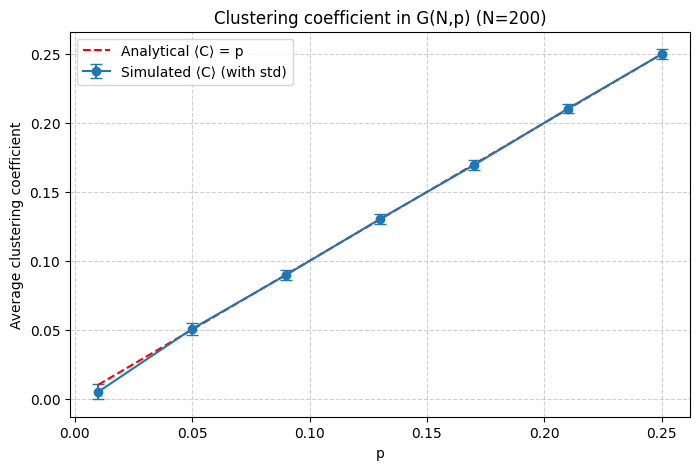

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def simulate_clustering(N, p, n_runs=100):
    Cs = []

    for _ in range(n_runs):
        G = nx.erdos_renyi_graph(N, p)
        C = nx.average_clustering(G)
        Cs.append(C)

    return np.array(Cs)

N = 200
p_values = np.linspace(0.01, 0.25, 7)
n_runs = 80

results_mean = []
results_std = []

for p in p_values:
    Cs = simulate_clustering(N, p, n_runs)
    results_mean.append(Cs.mean())
    results_std.append(Cs.std())
    print(f"p = {p:.3f},  simulated <C> = {Cs.mean():.4f} ± {Cs.std():.4f},  theory = {p:.3f}")

plt.figure(figsize=(8,5))
plt.errorbar(p_values, results_mean, yerr=results_std, fmt="o-", capsize=4,
             label="Simulated ⟨C⟩ (with std)")

plt.plot(p_values, p_values, "r--", label="Analytical ⟨C⟩ = p")

plt.xlabel("p")
plt.ylabel("Average clustering coefficient")
plt.title(f"Clustering coefficient in G(N,p) (N={N})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# P5.3
 Generate and draw a graph consisting of 4 community each with
N = 20 nodes and the probability of connection within the
community higher than between them. Draw the result. How it
depends on the parameter values?

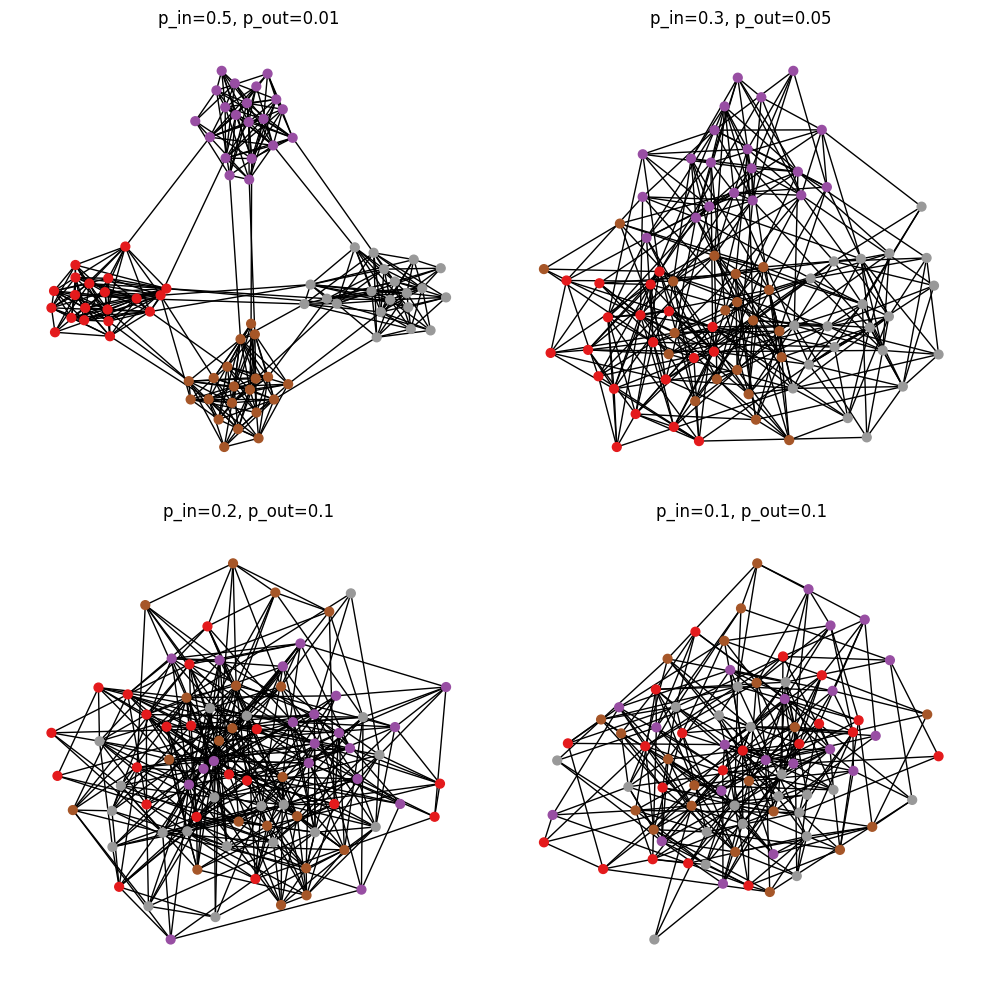

In [10]:
def community_graph_adj_matrix(num_communities=4, nodes_per_community=20,
                               p_in=0.4, p_out=0.02):
    N = num_communities * nodes_per_community
    A = np.zeros((N, N), dtype=int)

    for i in range(N):
        for j in range(i + 1, N):
            comm_i = i // nodes_per_community
            comm_j = j // nodes_per_community
            p = p_in if comm_i == comm_j else p_out
            if np.random.rand() < p:
                A[i, j] = 1
                A[j, i] = 1
    return A

def draw_community_graph(num_communities=4, nodes_per_community=20,
                         p_in=0.4, p_out=0.02):
    A = community_graph_adj_matrix(num_communities, nodes_per_community,
                                   p_in, p_out)
    G = nx.from_numpy_array(A)

    N = num_communities * nodes_per_community
    communities = [i // nodes_per_community for i in range(N)]

    pos = nx.spring_layout(G)

    plt.figure(figsize=(7, 7))
    nx.draw(
        G,
        pos,
        node_color=communities,
        cmap=plt.cm.Set1,
        with_labels=False,
        node_size=80
    )
    plt.title(f"4-community graph, N=20 per community\np_in={p_in}, p_out={p_out}")
    plt.show()

    return A, G

params = [
    (0.5, 0.01),
    (0.3, 0.05),
    (0.2, 0.10),
    (0.1, 0.10)
]

plt.figure(figsize=(10, 10))

for idx, (p_in, p_out) in enumerate(params, 1):
    A = community_graph_adj_matrix(
        num_communities=4,
        nodes_per_community=20,
        p_in=p_in,
        p_out=p_out
    )
    G = nx.from_numpy_array(A)
    communities = [i // 20 for i in range(80)]
    pos = nx.spring_layout(G, seed=42)

    plt.subplot(2, 2, idx)
    nx.draw(G, pos, node_color=communities, cmap=plt.cm.Set1,
            node_size=40, with_labels=False)
    plt.title(f"p_in={p_in}, p_out={p_out}")

plt.tight_layout()
plt.show()



The structure of the graph depends strongly on the relationship between
\( p_{\text{in}} \) and \( p_{\text{out}} \).

When \( p_{\text{in}} \gg p_{\text{out}} \) (e.g., 0.5 vs 0.01), the four communities
are clearly visible as dense, well-separated clusters.

As \( p_{\text{in}} \) decreases and \( p_{\text{out}} \) increases (e.g., 0.3/0.05 or
0.2/0.1), the boundaries between communities become less distinct and clusters
start to overlap.

When \( p_{\text{in}} \approx p_{\text{out}} \) (e.g., 0.1 vs 0.1), the community
structure disappears almost completely and the graph resembles a homogeneous
Erdős–Rényi random network.


# P5.4
 Draw a graph of the averaged coefficient of clustering of the WS
network against its parameter p. [1.5P]


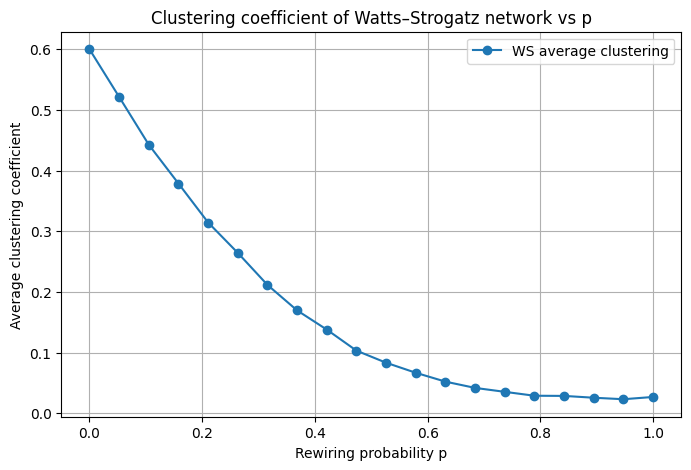

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def compute_ws_clustering(N=200, k=6, p_values=None, runs=20):
    if p_values is None:
        p_values = np.linspace(0, 1, 20)

    C_means = []

    for p in p_values:
        Cs = []
        for _ in range(runs):
            G = nx.watts_strogatz_graph(N, k, p)
            C = nx.average_clustering(G)
            Cs.append(C)
        C_means.append(np.mean(Cs))

    return p_values, np.array(C_means)

N = 200
k = 6
runs = 20
p_values = np.linspace(0, 1, 20)

ps, Cs = compute_ws_clustering(N, k, p_values, runs)

plt.figure(figsize=(8, 5))
plt.plot(ps, Cs, "o-", label="WS average clustering")
plt.xlabel("Rewiring probability p")
plt.ylabel("Average clustering coefficient")
plt.title("Clustering coefficient of Watts–Strogatz network vs p")
plt.grid(True)
plt.legend()
plt.show()


# P5.6
Implement configuration model and test when the procedure converge.

swaps/edge =  0.0, swaps =     0, avg clustering = 0.4523
swaps/edge =  0.5, swaps =   300, avg clustering = 0.0350
swaps/edge =  1.0, swaps =   600, avg clustering = 0.0271
swaps/edge =  2.0, swaps =  1200, avg clustering = 0.0275
swaps/edge =  5.0, swaps =  3000, avg clustering = 0.0258
swaps/edge = 10.0, swaps =  6000, avg clustering = 0.0331
swaps/edge = 20.0, swaps = 12000, avg clustering = 0.0315


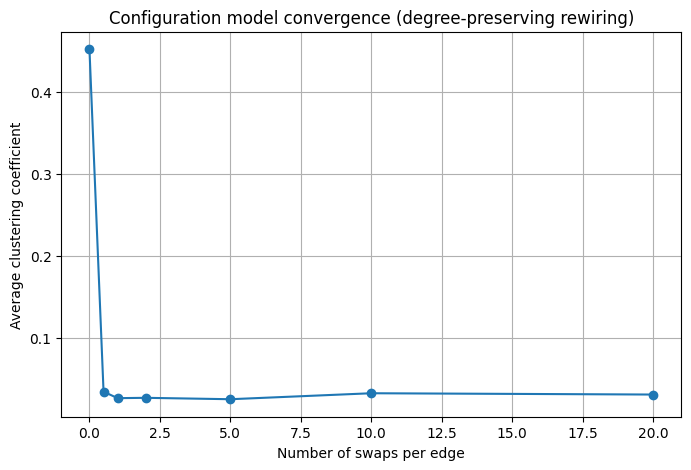

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

def random_edge_swap(G, num_swaps, max_tries_per_swap=10):
    G = G.copy()
    edges = list(G.edges())
    m = len(edges)
    successful_swaps = 0

    while successful_swaps < num_swaps:
        for _ in range(max_tries_per_swap):
            (u, v) = edges[random.randrange(m)]
            (x, y) = edges[random.randrange(m)]
            if len({u, v, x, y}) < 4:
                continue

            if random.random() < 0.5:
                a, b = u, x
                c, d = v, y
            else:
                a, b = u, y
                c, d = v, x

            if a == b or c == d:
                continue
            if G.has_edge(a, b) or G.has_edge(c, d):
                continue

            G.remove_edge(u, v)
            G.remove_edge(x, y)
            G.add_edge(a, b)
            G.add_edge(c, d)

            edges = list(G.edges())
            m = len(edges)
            successful_swaps += 1
            break
        else:
            break

    return G


def test_configuration_model_convergence():
    N = 200
    k = 6
    p_ws = 0.1
    G0 = nx.watts_strogatz_graph(N, k, p_ws)

    m = G0.number_of_edges()
    swaps_per_edge_list = [0, 0.5, 1, 2, 5, 10, 20]

    clustering_values = []

    for s in swaps_per_edge_list:
        num_swaps = int(s * m)
        G = random_edge_swap(G0, num_swaps)
        C = nx.average_clustering(G)
        clustering_values.append(C)
        print(f"swaps/edge = {s:4.1f}, swaps = {num_swaps:5d}, "
              f"avg clustering = {C:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(swaps_per_edge_list, clustering_values, "o-")
    plt.xlabel("Number of swaps per edge")
    plt.ylabel("Average clustering coefficient")
    plt.title("Configuration model convergence (degree-preserving rewiring)")
    plt.grid(True)
    plt.show()


test_configuration_model_convergence()
